In [1]:
import pandas as pd

from matplotlib import pyplot as plt
import seaborn as sns

In [122]:
path_111 = '200-10&10-10&5'
path_112 = '200-10&10-10&15'

path_121 = '200-10&20-10&5'
path_122 = '200-10&20-10&15'

path_211 = '200-25&10-10&5'
path_212 = '200-25&10-10&15'

path_221 = '200-25&20-10&5'
path_222 = '200-25&20-10&15'

path_std = 'agent_vars_tmp'

In [282]:
df = pd.read_csv(f'../data/agent_vars_{path_211}.csv')
model_vars = pd.read_csv(f'../data/model_vars_{path_211}.csv')

In [283]:
steps = list(df['Step'].unique())

In [284]:
# Convert agent ID to agent TYPE to study wealth distributions for each type of agent
mylist = df.AgentID.unique().tolist()
x = [i.replace('_', '') for i in mylist]
for n in range(10):
    x = [i.replace('{}'.format(n), '') for i in x]
    
df['Type'] = df['AgentID'].replace(mylist, x)

In [285]:
df

,Step,AgentID,cash,wealth,position,order,Type
0,1,whale_0,1.139427e+06,1.139427e+06,NaN,0.000000,whale
1,1,whale_1,5.250108e+05,5.250108e+05,NaN,0.000000,whale
2,1,shark_0,7.750290e+03,7.750290e+03,NaN,0.000000,shark
3,1,shark_1,1.236471e+04,1.236471e+04,NaN,0.000000,shark
4,1,shark_2,1.392180e+04,1.392180e+04,NaN,0.000000,shark
...,...,...,...,...,...,...,...
302995,1500,fish_155,1.281797e+03,1.281797e+03,short,0.045868,fish
302996,1500,fish_156,8.761932e+02,8.773482e+02,long,0.019716,fish
302997,1500,fish_157,1.347159e+03,1.350239e+03,short,0.052574,fish
302998,1500,fish_158,1.463664e+03,1.464306e+03,short,0.010580,fish


### Plot Methods

In [286]:
def plot_mean_cash_wealth(steps, df_type, ag_type):
    mean_cash = list()
    for step in steps:
        mean_cash.append(df_type[ df_type['Step'] == step ]['cash'].mean())
        
    mean_wealth = list()
    for step in steps:
        mean_wealth.append(df_type[ df_type['Step'] == step ]['wealth'].mean())
        
    fig, axs = plt.subplots(ncols = 2, figsize = (14, 5))
    axs[0].set_title(f'Mean Cash {ag_type}')
    axs[0].plot(steps, mean_cash, color = 'green')
    axs[0].set_ylabel('Mean Cash')
    axs[0].set_xlabel('Step')

    axs[1].plot(steps, mean_wealth, color = 'orange')
    axs[1].set_title(f'Mean Wealth {ag_type}')
    axs[1].set_ylabel('Mean Wealth')
    axs[1].set_xlabel('Step')
    plt.show();

In [287]:
def plot_positions(steps, df_type, ag_type):
    n_shorts = list()
    n_longs = list()
    for step in steps:        
        try:
            n_longs.append( df_type.loc[ df_type['Step'] == step ].value_counts(subset = ['position'], sort = False)[0] )
        except IndexError:
            n_longs.append(0)
    
    for step in steps:        
        try:
            n_shorts.append( df_type.loc[ df_type['Step'] == step ].value_counts(subset = ['position'], sort = False)[1] )
        except IndexError:
            n_shorts.append(0)
    
    fig, ax = plt.subplots(ncols = 1, figsize = (10, 6))
    ax.plot(steps, n_longs, color = 'green', label = 'long')
    ax.plot(steps, n_shorts, color = 'red', label = 'short')
    
    ax.set_title(f'What positions {ag_type} prefer to take')
    ax.set_ylabel('Number Positions')
    ax.set_xlabel('Timestep')
    ax.legend()
    plt.show();

## Compare wealths

In [345]:
path_111 = '200-10&10-10&5'
path_112 = '200-10&10-10&15'

path_121 = '200-10&20-10&5'
path_122 = '200-10&20-10&15'

path_211 = '200-25&10-10&5'
path_212 = '200-25&10-10&15'

path_221 = '200-25&20-10&5'
path_222 = '200-25&20-10&15'

path_fish = '200-10&10-10&6'

In [346]:
agent_111 = pd.read_csv(f'../data/agent_vars_{path_111}.csv')
agent_112 = pd.read_csv(f'../data/agent_vars_{path_112}.csv')

agent_121 = pd.read_csv(f'../data/agent_vars_{path_121}.csv')
agent_122 = pd.read_csv(f'../data/agent_vars_{path_122}.csv')

agent_211 = pd.read_csv(f'../data/agent_vars_{path_211}.csv')
agent_212 = pd.read_csv(f'../data/agent_vars_{path_212}.csv')

agent_221 = pd.read_csv(f'../data/agent_vars_{path_221}.csv')
agent_222 = pd.read_csv(f'../data/agent_vars_{path_222}.csv')

agent_f = pd.read_csv(f'../data/agent_vars_{path_fish}.csv')

In [347]:
agents = [agent_111, agent_112, agent_121, agent_122, agent_211, agent_212, agent_221, agent_222, agent_f]

In [348]:
steps = list(agent_111['Step'].unique())

In [349]:
for df in agents:
    # Convert agent ID to agent TYPE to study wealth distributions for each type of agent
    mylist = df.AgentID.unique().tolist()
    x = [i.replace('_', '') for i in mylist]
    for n in range(10):
        x = [i.replace('{}'.format(n), '') for i in x]

    df['Type'] = df['AgentID'].replace(mylist, x)

In [350]:
for df in [agent_f]:
    
    df_fish = df[ df['Type'] == 'fish' ]
    df_shark = df[ df['Type'] == 'shark' ]
    df_whale = df[ df['Type'] == 'whale' ]
    
    mean_wealth_fish = list(); mean_wealth_shark = list(); mean_wealth_whale = list()
    for step in steps:
        mean_wealth_fish.append(df_fish[ df_fish['Step'] == step ]['wealth'].mean())
        mean_wealth_shark.append(df_shark[ df_shark['Step'] == step ]['wealth'].mean())
        mean_wealth_whale.append(df_whale[ df_whale['Step'] == step ]['wealth'].mean())

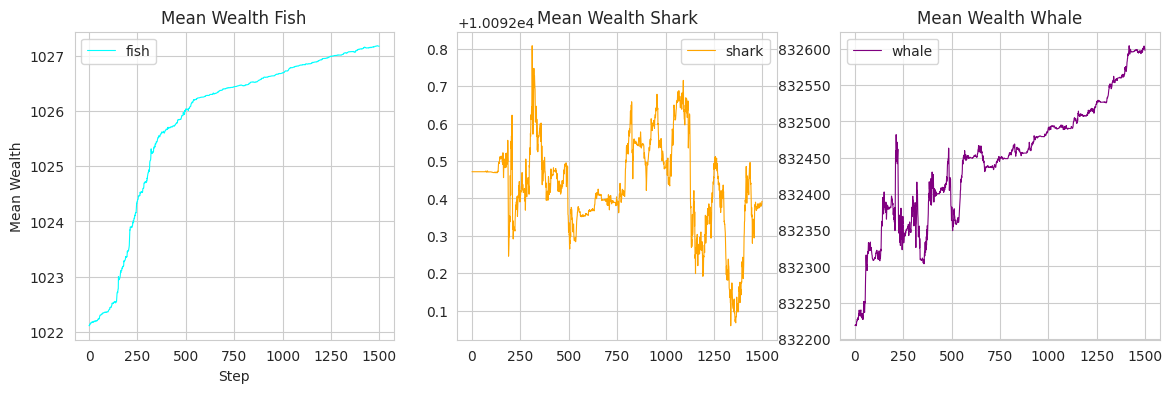

In [351]:
fig, axs = plt.subplots(ncols = 3, figsize = (14, 4))

sns.lineplot(
    data = mean_wealth_fish, label = 'fish', ax = axs[0], lw = 0.8, color = 'cyan'
)
sns.lineplot(
    data = mean_wealth_shark, label = 'shark', ax = axs[1], lw = 0.8, color = 'orange'
)
sns.lineplot(
    data = mean_wealth_whale, label = 'whale', ax = axs[2], lw = 0.8, color = 'purple'
)

axs[0].set_title(f'Mean Wealth Fish'); axs[1].set_title(f'Mean Wealth Shark'); axs[2].set_title(f'Mean Wealth Whale')
axs[0].set_ylabel('Mean Wealth');
axs[0].set_xlabel('Step');
plt.show();

## Whale's positions

In [323]:
model_212 = pd.read_csv(f'../data/model_vars_{path_212}.csv')
prices = model_212['Price'].to_list()

df_whale_chosen = df_whale[ df_whale['AgentID'] == 'whale_0' ].copy()
df_whale_chosen['Price'] = prices

In [324]:
l_flags = list()
for i in range(len(df_whale_chosen)):
    if df_whale_chosen['position'].iloc[i] == 'long':
        l_flags.append(df_whale_chosen['Price'].iloc[i] - 1)
    else:
        l_flags.append(0)
        
s_flags = list()
for i in range(len(df_whale_chosen)):
    if df_whale_chosen['position'].iloc[i] == 'short':
        s_flags.append(df_whale_chosen['Price'].iloc[i] - 1)
    else:
        s_flags.append(0)

In [325]:
df_whale_chosen['shorts'] = s_flags
df_whale_chosen['longs'] = l_flags

In [326]:
df_flags = df_whale_chosen[ ['Price', 'longs', 'shorts'] ]

In [327]:
sns.set_style('whitegrid')

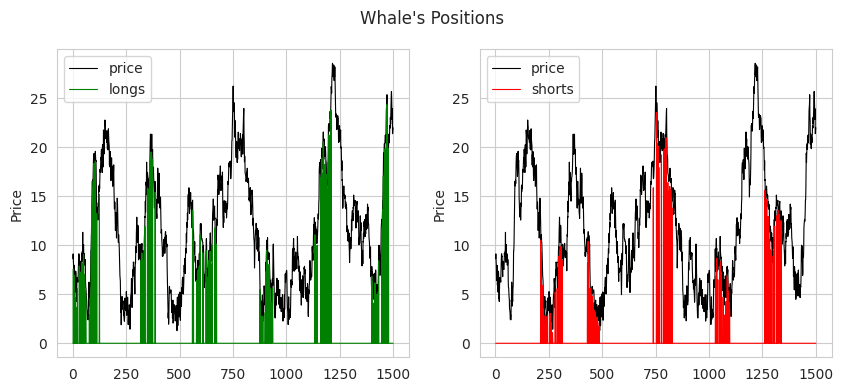

In [328]:
fig, axs = plt.subplots(ncols = 2, figsize = (10, 4))
fig.suptitle("Whale's Positions")

sns.lineplot(
    data = df_flags, x = steps ,y = 'Price', label = 'price', ax = axs[0], lw = 0.8, color = 'black'
)
sns.lineplot(
    data = df_flags, x = steps ,y = 'longs', label = 'longs', ax = axs[0], lw = 0.8, color = 'green'
)

sns.lineplot(
    data = df_flags, x = steps ,y = 'Price', label = 'price', ax = axs[1], lw = 0.8, color = 'black'
)
sns.lineplot(
    data = df_flags, x = steps, y = 'shorts', label = 'shorts', ax = axs[1], lw = 0.8, color = 'red'
)

plt.show();

## Stats for a fixed agent

In [104]:
df[ df['AgentID'] == 'whale_0' ]

,Step,AgentID,cash,wealth,position,order,Type
0,1,whale_0,1.139427e+06,1.139427e+06,NaN,0.000000,whale
202,2,whale_0,1.139427e+06,1.139427e+06,NaN,0.000000,whale
404,3,whale_0,1.139427e+06,1.139427e+06,NaN,0.000000,whale
606,4,whale_0,1.139423e+06,1.139427e+06,long,0.319829,whale
808,5,whale_0,1.139423e+06,1.139428e+06,NaN,0.000000,whale
...,...,...,...,...,...,...,...
301990,1496,whale_0,1.139673e+06,1.139752e+06,NaN,0.000000,whale
302192,1497,whale_0,1.139673e+06,1.139759e+06,NaN,0.000000,whale
302394,1498,whale_0,1.139673e+06,1.139774e+06,NaN,0.000000,whale
302596,1499,whale_0,1.139673e+06,1.139771e+06,NaN,0.000000,whale


In [120]:
i_agent = 0
agent = f'shark_{i_agent}'
df_agent = df[ df['AgentID'] == agent ]

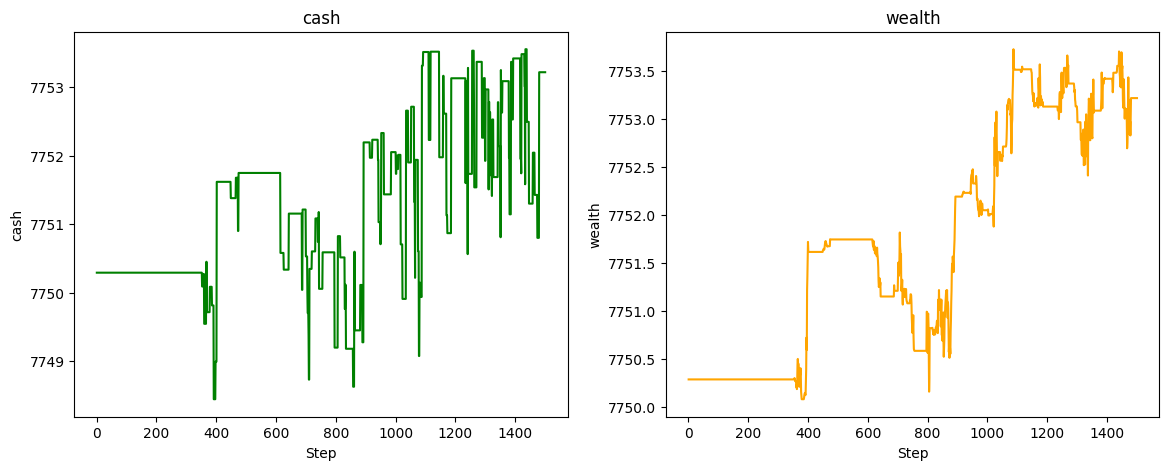

In [121]:
fig, axs = plt.subplots(ncols = 2, figsize = (14, 5))

sns.lineplot(data = df_agent, x = 'Step', y = 'cash', color = 'green', ax = axs[0]).set_title(f'cash')
sns.lineplot(data = df_agent, x = 'Step', y = 'wealth', color = 'orange', ax = axs[1]).set_title(f'wealth')
plt.show();

In [109]:
df_agent

,Step,AgentID,cash,wealth,position,order,Type
1,1,whale_1,525003.107356,525010.760000,long,0.765264,whale
203,2,whale_1,525003.107356,525010.724409,NaN,0.000000,whale
405,3,whale_1,525003.107356,525011.710356,NaN,0.000000,whale
607,4,whale_1,525003.107356,525011.435040,NaN,0.000000,whale
809,5,whale_1,525003.107356,525013.296624,NaN,0.000000,whale
...,...,...,...,...,...,...,...
301991,1496,whale_1,524949.620143,525014.044282,NaN,0.000000,whale
302193,1497,whale_1,524948.708024,525020.166310,short,0.108466,whale
302395,1498,whale_1,524946.708253,525033.961256,short,0.345591,whale
302597,1499,whale_1,524946.708253,525031.197696,NaN,0.000000,whale
